# Segmentación de Clientes - Análisis Refinado

En este notebook trabajaremos con una base de datos de facturación (invoice data) que contiene información sobre ventas, clientes y transacciones. Nuestro objetivo es realizar una segmentación de clientes basada en sus características, pero con un enfoque depurado para evitar que las categorías queden demasiado amontonadas.

### Columnas principales:
- **invoice_no:** Número de factura
- **customer_id:** Identificador del cliente
- **gender:** Género
- **age:** Edad del cliente
- **category:** Categoría del producto (Clothing, Shoes, Books, etc.)
- **quantity:** Cantidad comprada
- **price:** Precio unitario
- **payment_method:** Método de pago (Credit Card, Debit Card, Cash, etc.)
- **invoice_date:** Fecha de la factura
- **shopping_mall:** Centro comercial donde se realizó la compra

### Objetivos del Taller:

1. Explorar, limpiar y entender la base de datos.
2. Crear variables derivadas (por ejemplo, el valor total de la compra).
3. Reducir la cantidad de categorías (por ejemplo, agrupar aquellas con muy pocos registros) para lograr un análisis más claro.
4. Definir criterios de segmentación demográfica y comportamental.
5. Visualizar los segmentos usando la paleta corporativa.
6. Formular preguntas específicas para discutir implicaciones de marketing.

### Paleta Corporativa a Utilizar:
- Azul: `#0033A0`
- Naranja: `#FF6600`
- Blanco: `#FFFFFF`

¡Sigan cada paso y al final discutan qué implicaciones de marketing se derivan de cada segmento!

In [1]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip

--2025-04-09 23:35:29--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip [following]
--2025-04-09 23:35:30--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1712272 (1.6M) [application/zip]
Saving to: ‘customer_shopping_data.csv.zip’

cus

In [2]:
!unzip customer_shopping_data.csv.zip

Archive:  customer_shopping_data.csv.zip
  inflating: customer_shopping_data.csv  


In [3]:
# =============================================================================
# IMPORTS Y CONFIGURACIONES INICIALES
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Paleta corporativa
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']

# Ajuste de estética con Seaborn
sns.set(style="whitegrid")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=corporate_colors)

print("Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.")

Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.


## 1. Carga y Vista Rápida del Dataset

Carguen la base de datos denominada `customer_shopping_data.csv`. Observen las dimensiones y las primeras filas para familiarizarse con la estructura de los datos.

In [4]:
# =============================================================================
# 1. CARGA Y VISTA RÁPIDA DEL DATASET
# =============================================================================

df = pd.read_csv('customer_shopping_data.csv')

print("Dimensiones del DataFrame:")
print(df.shape)

print("\nVista rápida de los primeros registros:")
df.head()

Dimensiones del DataFrame:
(99457, 10)

Vista rápida de los primeros registros:


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


## 2. Análisis Exploratorio Inicial

Revisen la estructura, los tipos de datos y las estadísticas descriptivas del dataset.

**Pregunta para los estudiantes:** ¿Qué columnas consideran críticas para segmentar a los clientes y por qué?

Customer_id: Permite agrupar las transacciones y analizar el comportamiento individual de cada cliente.
Gender y Age: Son claves para segmentar adecuadamente, ya que conocer el género y la edad facilita la creación de perfiles de clientes.
Category: Ayuda a identificar los patrones de compra de los clientes, lo cual es útil para comprender sus intereses y necesidades.
Invoice_date: Es útil para segmentar según el comportamiento de compra, especialmente en cuanto a la frecuencia y la antigüedad de las transacciones.
Total_purchase_value: Permite segmentar a los clientes según el valor de sus compras, lo que ayuda a identificar a los clientes más valiosos.

## 3. Limpieza de Datos

Identifiquen y gestionen valores nulos y duplicados. Es esencial dejar la base limpia para un análisis confiable.

**Pregunta:** ¿Qué variables presentan problemas de calidad de datos y cómo los resolverían?

In [5]:
print("Valores nulos en el DataFrame:")
print(df.isnull().sum())

print("\nDuplicados en el DataFrame:")
print(df.duplicated().sum())

df_cleaned = df.dropna(subset=['gender', 'age'])
# Replace df_ with df_cleaned in the next line
df_cleaned['age'].fillna(df_cleaned['age'].median(), inplace=True)  # Also calculate the median age from df_cleaned
print(df_cleaned.isnull().sum())

duplicated_rows = df_cleaned[df_cleaned.duplicated()]
print("\nDuplicados en el DataFrame:")
print(duplicated_rows)

df_cleaned = df_cleaned.drop_duplicates()
print(f"Numero de filas después de eliminar duplicados: {len(df_cleaned)}")


Valores nulos en el DataFrame:
invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

Duplicados en el DataFrame:
0


<ipython-input-5-054df571f34d>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['age'].fillna(df_cleaned['age'].median(), inplace=True)  # Also calculate the median age from df_cleaned


invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

Duplicados en el DataFrame:
Empty DataFrame
Columns: [invoice_no, customer_id, gender, age, category, quantity, price, payment_method, invoice_date, shopping_mall]
Index: []
Numero de filas después de eliminar duplicados: 99457


## 4. Creación de Variables Derivadas

Generen nuevas variables que puedan aportar a la segmentación. Por ejemplo, calculen el **valor total** de la factura (multiplicar `quantity` por `price`).

**Pregunta:** ¿Qué otras variables derivadas podrían ser útiles para analizar el comportamiento de compra?

In [6]:
df_cleaned['total_value'] = df_cleaned['quantity'] * df_cleaned['price']
print(df_cleaned[['quantity', 'price', 'total_value']].head())

   quantity    price  total_value
0         5  1500.40      7502.00
1         3  1800.51      5401.53
2         1   300.08       300.08
3         5  3000.85     15004.25
4         4    60.60       242.40


## 5. Visualización de Distribuciones

Visualicen la distribución de variables clave, como `age` y `total_value`, usando histogramas y boxplots. Usen la paleta corporativa en los gráficos.

**Pregunta:** ¿Detectan patrones o valores atípicos que requieran atención?

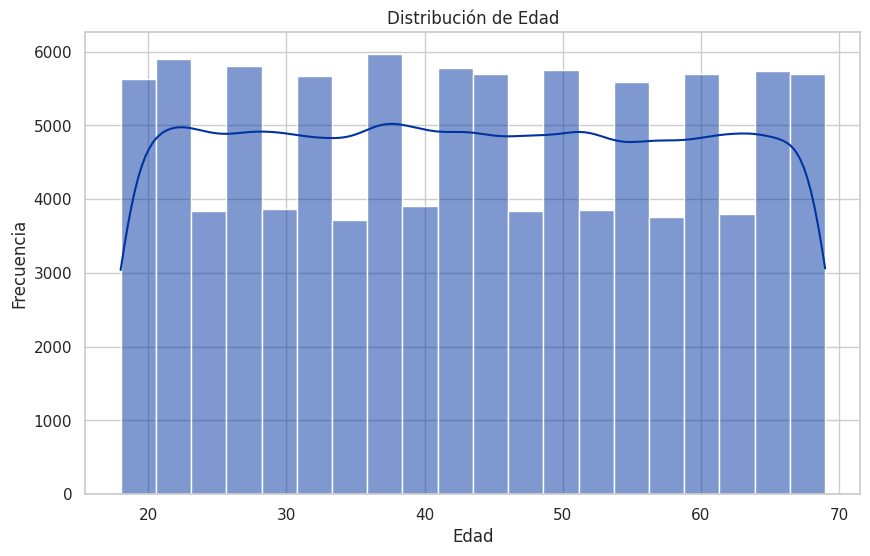

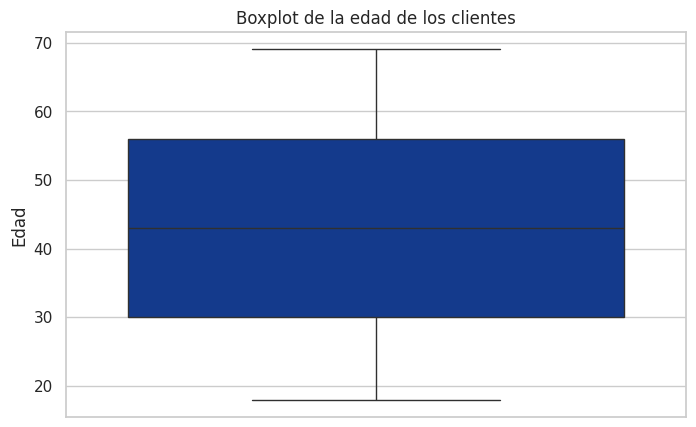

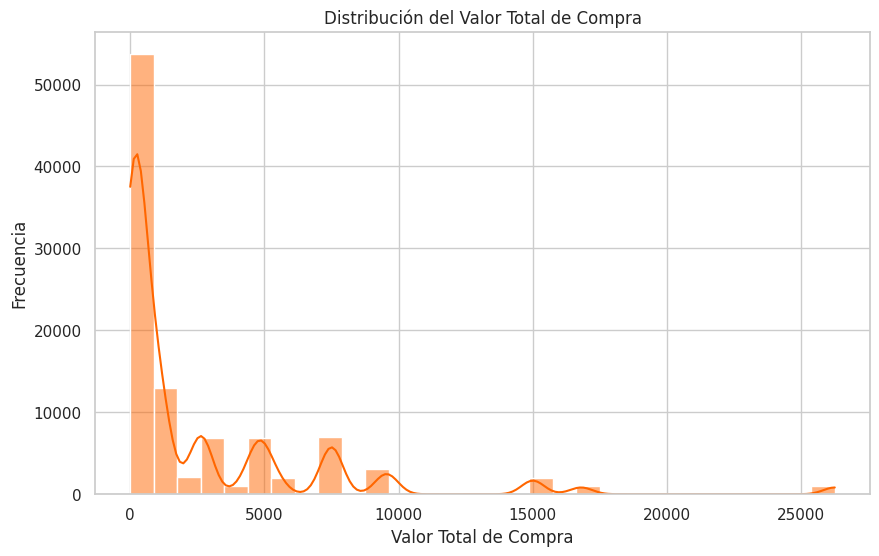

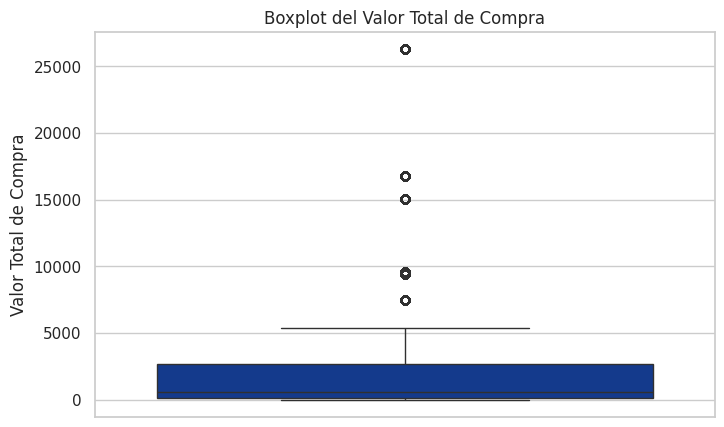

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_palette(corporate_colors)

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['age'], bins=20, kde=True, color=corporate_colors[0])
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(y=df_cleaned['age'])
plt.title('Boxplot de la edad de los clientes')
plt.ylabel('Edad')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['total_value'], bins=30, kde=True, color=corporate_colors[1])
plt.title('Distribución del Valor Total de Compra')
plt.xlabel('Valor Total de Compra')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(y=df_cleaned['total_value'])
plt.title('Boxplot del Valor Total de Compra')
plt.ylabel('Valor Total de Compra')
plt.show()

## 6. Definición de Criterios de Segmentación Demográfica

Segmenten a los clientes en función de variables demográficas, por ejemplo, agrupando la edad en categorías (Jóvenes, Adultos, Mayores) y analizando el género.

**Pregunta:** ¿Cómo segmentarían a los clientes en función de la edad y el género para dirigir campañas específicas?

Los jóvenes tal vez se fijen en lo que está de moda, precios que no sean tan altos, productos tecnológicos y lo que se ve en redes sociales.

Los adultos probablemente tengan más dinero disponible y busquen productos que les den más comodidad, sin que el precio sea lo más importante.

Los adultos mayores, por su parte, suelen estar más interesados en temas de salud y bienestar, además de productos fáciles de usar.

Con estas características, se pueden crear estrategias que apunten a cada grupo de edad de manera más efectiva.

In [8]:
bins_edad = [0, 30, 50, 100]
labels_edad = ['Joven', 'Adulto', 'Mayor']
df_cleaned['edad_grupo'] = pd.cut(df_cleaned['age'], bins=bins_edad, labels=labels_edad, right=False)
print(df_cleaned[['age', 'edad_grupo']].head())
analisis_genero = df_cleaned.groupby('gender').agg({'customer_id': 'count'})
print(analisis_genero)
analisis_edad_genero = df_cleaned.groupby(['edad_grupo', 'gender']).agg({'customer_id': 'count'})
print(analisis_edad_genero)

   age edad_grupo
0   28      Joven
1   21      Joven
2   20      Joven
3   66      Mayor
4   53      Mayor
        customer_id
gender             
Female        59482
Male          39975
                   customer_id
edad_grupo gender             
Joven      Female        13727
           Male           9316
Adulto     Female        23040
           Male          15400
Mayor      Female        22715
           Male          15259


<ipython-input-8-d1f377124b24>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analisis_edad_genero = df_cleaned.groupby(['edad_grupo', 'gender']).agg({'customer_id': 'count'})


## 7. Definición de Criterios de Segmentación Comportamental

Segmenten a los clientes según su comportamiento de compra. Revisen variables como `category`, `payment_method` y `shopping_mall`.

**Pregunta:** ¿Qué comportamiento de compra (categoría, método de pago, centro comercial) consideran de mayor impacto para la estrategia de marketing? ¿Por qué?

In [9]:
segmento_completo_clientes = df_cleaned.groupby(['category', 'payment_method', 'shopping_mall'])['customer_id'].nunique()
print("Numero de clientes unicos por categoria, metodo de pago y centro comercial:\n", segmento_completo_clientes)

segmento_completo_valor = df_cleaned.groupby(['category', 'payment_method', 'shopping_mall'])['total_value'].sum()
print("\nValor total por categoria, metodo de pago y centro comercial:\n", segmento_completo_valor)


Numero de clientes unicos por categoria, metodo de pago y centro comercial:
 category  payment_method  shopping_mall    
Books     Cash            Cevahir AVM          115
                          Emaar Square Mall    101
                          Forum Istanbul       117
                          Istinye Park         215
                          Kanyon               466
                                              ... 
Toys      Debit Card      Mall of Istanbul     387
                          Metrocity            311
                          Metropol AVM         225
                          Viaport Outlet        81
                          Zorlu Center         107
Name: customer_id, Length: 240, dtype: int64

Valor total por categoria, metodo de pago y centro comercial:
 category  payment_method  shopping_mall    
Books     Cash            Cevahir AVM           20194.95
                          Emaar Square Mall     18801.15
                          Forum Istanbul        182

## 8. Visualizaciones Comparativas de Segmentos

Crucen variables demográficas y comportamentales para identificar relaciones relevantes. Por ejemplo, comparen el grupo de edad con la categoría de producto.

**Pregunta:** ¿Qué relaciones entre estas variables podrían definir segmentos de alto valor?

<ipython-input-10-21d5e2dc41a8>:2: UserWarning: 
The palette list has fewer values (3) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df_cleaned, x='edad_grupo', hue='category', palette=corporate_colors)


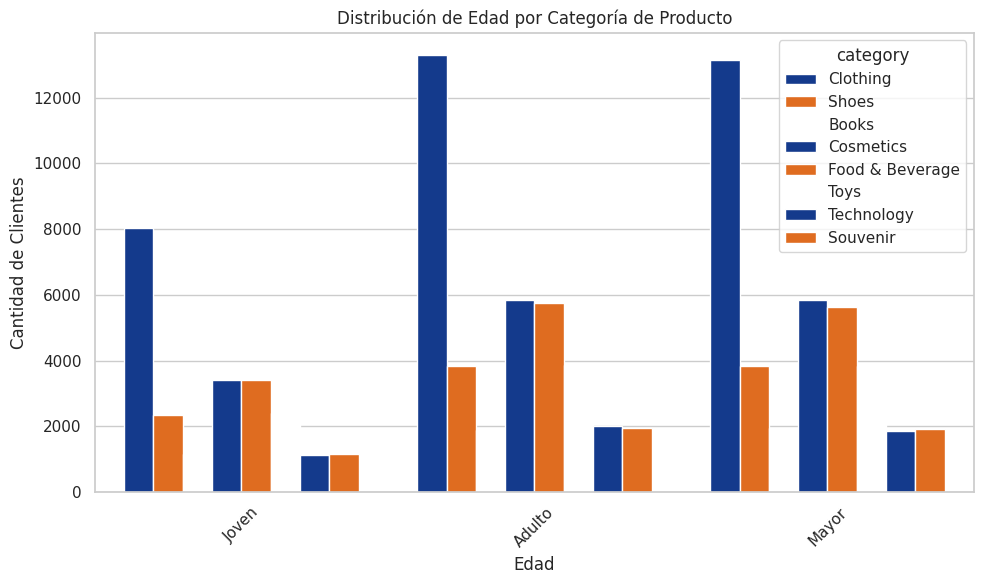

<ipython-input-10-21d5e2dc41a8>:11: UserWarning: 
The palette list has fewer values (3) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df_cleaned, x='edad_grupo', hue='shopping_mall', palette=corporate_colors)


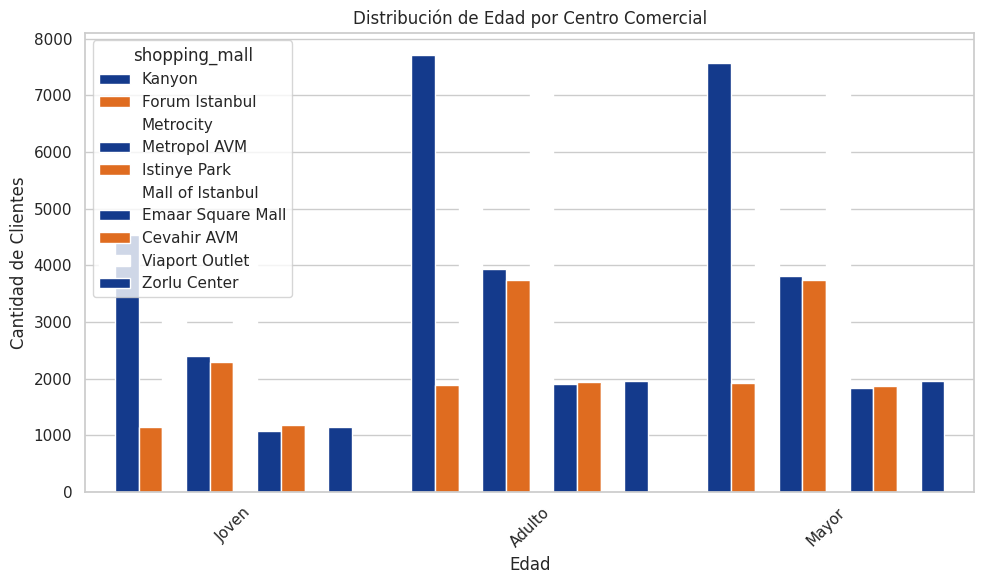

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='edad_grupo', hue='category', palette=corporate_colors)
plt.title('Distribución de Edad por Categoría de Producto')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='edad_grupo', hue='shopping_mall', palette=corporate_colors)
plt.title('Distribución de Edad por Centro Comercial')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



category_mapping = {
    'Category1': 'Group1',
    'Category2': 'Group1',
    'Category3': 'Group2',

}


df_cleaned['category_agrupada'] = df_cleaned['category'].map(category_mapping)


## 9. Reducción y Agrupación de Categorías

Si encuentran que hay demasiadas categorías o que algunas tienen muy pocos registros, agrupen aquellas que sean similares o con bajo volumen para evitar análisis amontonados.

**Ejemplo:** Si hay muchas categorías de tecnología o juguetes con pocos registros, podrían agruparlas en "Otros" o "Tecnología/Entretenimiento".

**Pregunta:** ¿Qué categorías agruparían y por qué?

In [11]:
category_counts = df_cleaned['category'].value_counts()
umbral_baja_frecuencia = 500

categorias_a_agrupar = category_counts[category_counts < umbral_baja_frecuencia].index

df_cleaned['category_agrupada'] = df_cleaned['category'].apply(lambda x: 'Otros' if x in categorias_a_agrupar else x)

print(df_cleaned['category_agrupada'].value_counts())

def agrupar_fashion(categoria):
  if categoria in ['Clothing', 'Shoes']:
    return 'Fashion'
  else:
    return categoria

df_cleaned['category_agrupada'] = df_cleaned['category'].apply(agrupar_fashion)
print(df_cleaned['category_agrupada'].value_counts())


category_agrupada
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64
category_agrupada
Fashion            44521
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64


## 10. Creación de Segmentación Manual Combinada

Combinen criterios demográficos (por ejemplo, grupo de edad) y comportamentales (por ejemplo, categoría reducida y shopping mall) para formar un único segmento combinado.

**Pregunta:** ¿Qué combinación de variables creen que ofrece el perfil más completo para orientar estrategias de marketing?

In [12]:
df_cleaned['segmento_combinado'] = df_cleaned['edad_grupo'].astype(str) + '_' + \
    df_cleaned['gender'].astype(str) + '_' + \
    df_cleaned['category_agrupada'].astype(str) + '_' + \
    df_cleaned['shopping_mall'].astype(str)
print(df_cleaned['segmento_combinado'].value_counts().head(20))
print(df_cleaned['segmento_combinado'].value_counts().head(20))

segmento_combinado
Adulto_Female_Fashion_Kanyon              2104
Mayor_Female_Fashion_Mall of Istanbul     2064
Adulto_Female_Fashion_Mall of Istanbul    2022
Mayor_Female_Fashion_Kanyon               2015
Adulto_Female_Fashion_Metrocity           1547
Mayor_Female_Fashion_Metrocity            1542
Adulto_Male_Fashion_Mall of Istanbul      1413
Mayor_Male_Fashion_Mall of Istanbul       1371
Adulto_Male_Fashion_Kanyon                1364
Mayor_Male_Fashion_Kanyon                 1327
Joven_Female_Fashion_Kanyon               1233
Joven_Female_Fashion_Mall of Istanbul     1215
Adulto_Female_Fashion_Metropol AVM        1093
Mayor_Male_Fashion_Metrocity              1061
Adulto_Male_Fashion_Metrocity             1025
Adulto_Female_Fashion_Istinye Park        1017
Mayor_Female_Fashion_Istinye Park          992
Mayor_Female_Fashion_Metropol AVM          989
Joven_Female_Fashion_Metrocity             900
Joven_Male_Fashion_Mall of Istanbul        861
Name: count, dtype: int64
segmento_combin

## 11. Análisis Final de los Grupos Resultantes

Analicen cómo se comportan los segmentos combinados en relación al **valor total de compra**. Identifiquen cuáles tienen un alto valor promedio y discutan sus implicaciones para la estrategia de marketing.

**Pregunta:** ¿Qué segmento destaca por tener un alto valor total y qué estrategias sugerirían para potenciarlo?

In [13]:
valor_promedio_por_segmento = df_cleaned.groupby('segmento_combinado')['total_value'].mean().sort_values(ascending=False)
print("Valor total de compra promedio por segmento combinado (Top 20):\n", valor_promedio_por_segmento.head(20))


Valor total de compra promedio por segmento combinado (Top 20):
 segmento_combinado
Joven_Female_Technology_Viaport Outlet        15750.000000
Adulto_Male_Technology_Zorlu Center           13542.307692
Adulto_Male_Technology_Cevahir AVM            13335.000000
Mayor_Male_Technology_Metropol AVM            13284.782609
Mayor_Female_Technology_Zorlu Center          13101.136364
Joven_Female_Technology_Emaar Square Mall     12968.918919
Mayor_Male_Technology_Cevahir AVM             12810.000000
Adulto_Female_Technology_Kanyon               12795.762712
Adulto_Female_Technology_Viaport Outlet       12600.000000
Mayor_Female_Technology_Kanyon                12535.526316
Mayor_Male_Technology_Mall of Istanbul        12446.000000
Adulto_Female_Technology_Mall of Istanbul     12407.812500
Mayor_Male_Technology_Zorlu Center            12198.529412
Joven_Male_Technology_Metropol AVM            12194.318182
Adulto_Male_Technology_Metrocity              12124.817518
Adulto_Female_Technology_Emaar 

## 12. Recomendaciones de Marketing

Con base en el análisis de los segmentos, respondan las siguientes preguntas:

- ¿Qué segmentos tienen mayor potencial en términos de valor y frecuencia de compra?
- ¿Qué estrategias de marketing implementarían para segmentos con bajo valor promedio?
- ¿Cómo influye la categoría de producto (tras la reducción) y el centro comercial en el comportamiento de compra?

Escriban sus respuestas en una celda Markdown o en un documento complementario, justificando cada estrategia.

In [14]:
frecuencia_por_cliente = df_cleaned.groupby('customer_id')['invoice_no'].nunique()
frecuencia_por_cliente = df_cleaned.groupby('customer_id')['invoice_no'].nunique()
df_con_frecuencia = pd.merge(df_cleaned, frecuencia_por_cliente.rename('frecuencia'), on='customer_id')
potencial_segmentos = df_con_frecuencia.groupby('segmento_combinado').agg({'total_value': 'mean', 'frecuencia': 'mean', 'customer_id': 'nunique'}).sort_values(by=['total_value', 'frecuencia'], ascending=False)
print("potencial de segmentos(valor promedio, frecuencia promedio, clientes unicos):\n", potencial_segmentos.head(10))

valor_por_categoria_agrupada = df_cleaned.groupby('category_agrupada')['total_value'].mean().sort_values(ascending=False)
print("Valor promedio por categoria agrupada:\n", valor_por_categoria_agrupada)

valor_por_centro_comercial = df_cleaned.groupby('shopping_mall')['total_value'].mean().sort_values(ascending=False)
print("Valor promedio por centro comercial:\n", valor_por_centro_comercial)

potencial de segmentos(valor promedio, frecuencia promedio, clientes unicos):
                                             total_value  frecuencia  \
segmento_combinado                                                    
Joven_Female_Technology_Viaport Outlet     15750.000000         1.0   
Adulto_Male_Technology_Zorlu Center        13542.307692         1.0   
Adulto_Male_Technology_Cevahir AVM         13335.000000         1.0   
Mayor_Male_Technology_Metropol AVM         13284.782609         1.0   
Mayor_Female_Technology_Zorlu Center       13101.136364         1.0   
Joven_Female_Technology_Emaar Square Mall  12968.918919         1.0   
Mayor_Male_Technology_Cevahir AVM          12810.000000         1.0   
Adulto_Female_Technology_Kanyon            12795.762712         1.0   
Adulto_Female_Technology_Viaport Outlet    12600.000000         1.0   
Mayor_Female_Technology_Kanyon             12535.526316         1.0   

                                           customer_id  
segmento_co

## 13. Toma de Decisiones y Conclusiones

Finalmente, el equipo de marketing debe decidir:

- ¿Cuántos segmentos son óptimos para la estrategia de la empresa?
- ¿Cómo asignar el presupuesto de marketing entre estos segmentos?
- ¿Qué indicadores se utilizarán para medir el éxito de las campañas en cada segmento?

**Actividad Final:**

1. Seleccionen el segmento con mayor potencial en términos de valor y frecuencia de compra.
2. Propongan una estrategia específica (campañas, promociones, ofertas personalizadas) para ese segmento.
3. Justifiquen su elección y expliquen cómo monitorizarán el desempeño de la campaña.

¡Discútanlo en grupo y compartan sus conclusiones!